In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.weightstats import ttest_ind

data = pd.read_csv("kalk.txt", sep = "\s+")
data.head()

,sample,tit1,tit2
0,1,76.35,76.35
1,1,76.20,76.25
2,1,76.40,76.20
3,1,76.50,76.45
4,1,76.50,76.25


### Exercise 1

<Axes: xlabel='tit1', ylabel='tit2'>

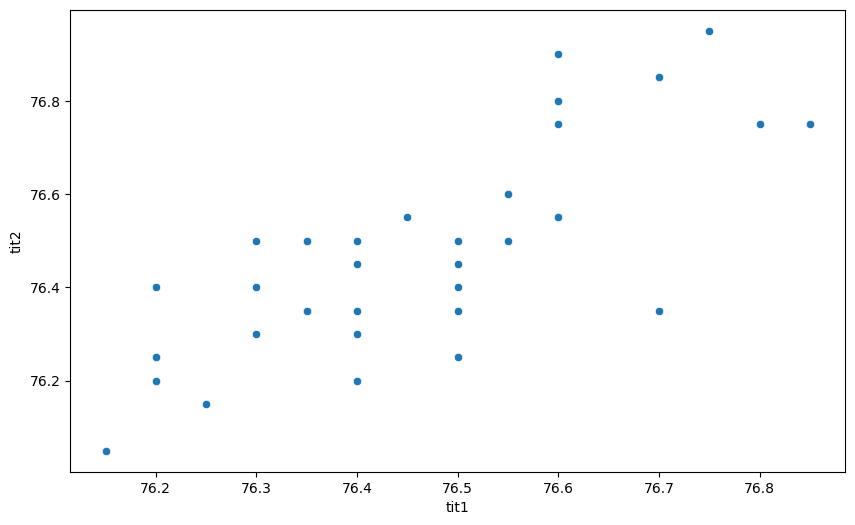

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="tit1",y="tit2",data=data)


### Exercise 3

In [13]:
train = data[:30]
test = data[30:]

model = sm.OLS(data["tit2"],sm.add_constant(data["tit1"])).fit()
model.params

const    4.056740
tit1     0.947137
dtype: float64

alpha og  beta er de ukende parametere i modellen

### Exercise 4

Mean squared prediction error: 0.014924762790495849


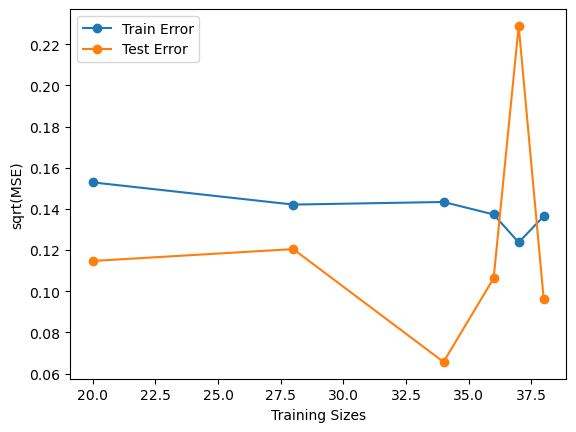

In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read the data
kalk = pd.read_csv('kalk.txt', delimiter="\t")

# 75% to training data, 25% to test data
train_ids = list(range(30))

# Split data
kalk_train = kalk.iloc[train_ids, :]
kalk_test = kalk.iloc[~kalk.index.isin(train_ids), :]

# Fit the model
L = LinearRegression().fit(kalk_train[['tit1']], kalk_train['tit2'])

# Predictions
predictions = L.predict(kalk_test[['tit1']])
mse = mean_squared_error(kalk_test['tit2'], predictions)
print(f'Mean squared prediction error: {mse}')

# Choose some training/test sizes
train_sizes = [20,28,34,36,37,38]

train_error = []
test_error = []

for size in train_sizes:
    # Random each time
    train_ids = np.random.choice(40, size, replace=False)
    
    # Split data
    kalk_train = kalk.iloc[train_ids, :]
    kalk_test = kalk.iloc[~kalk.index.isin(train_ids), :]
    
    L = LinearRegression().fit(kalk_train[['tit1']], kalk_train['tit2'])
    
    # Training error
    train_predictions = L.predict(kalk_train[['tit1']])
    train_mse = mean_squared_error(kalk_train['tit2'], train_predictions)
    train_error.append(np.sqrt(train_mse))
    
    # Test error
    test_predictions = L.predict(kalk_test[['tit1']])
    test_mse = mean_squared_error(kalk_test['tit2'], test_predictions)
    test_error.append(np.sqrt(test_mse))

# Smart plot
plt.plot(train_sizes, train_error, label='Train Error', marker='o')
plt.plot(train_sizes, test_error, label='Test Error', marker='o')
plt.xlabel('Training Sizes')
plt.ylabel('sqrt(MSE)')
plt.legend()
plt.show()